<a href="https://colab.research.google.com/github/EoinMcF/pairs_project_sm/blob/main/AMA3020_Graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

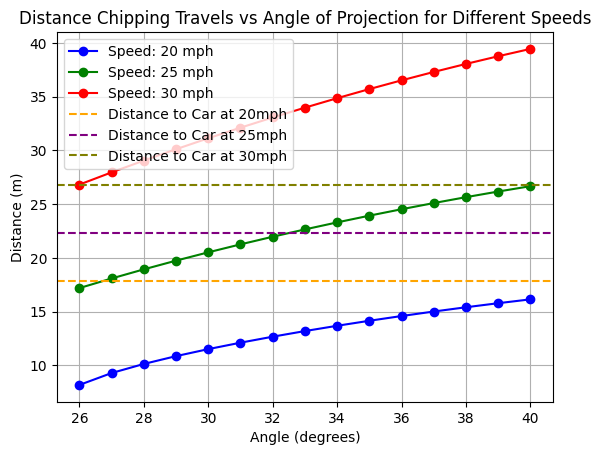

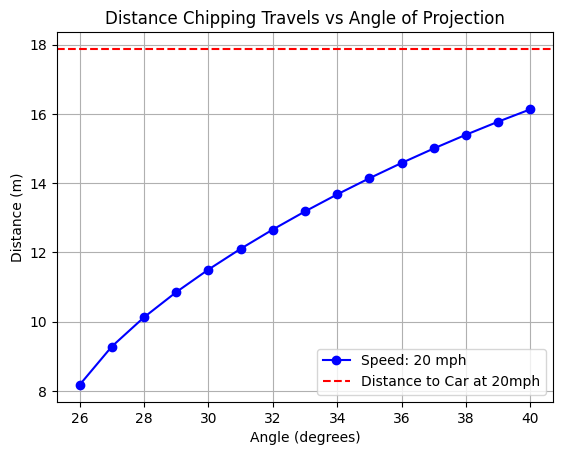

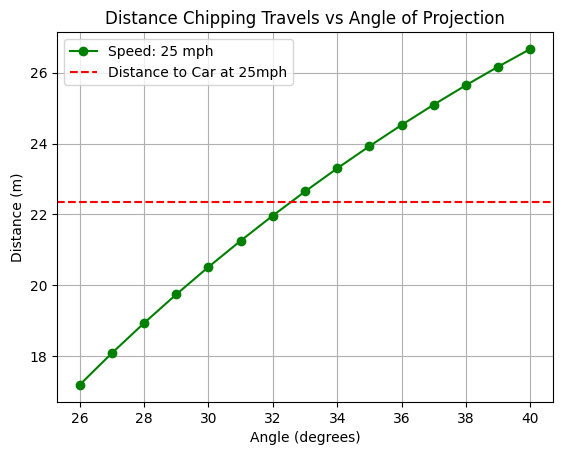

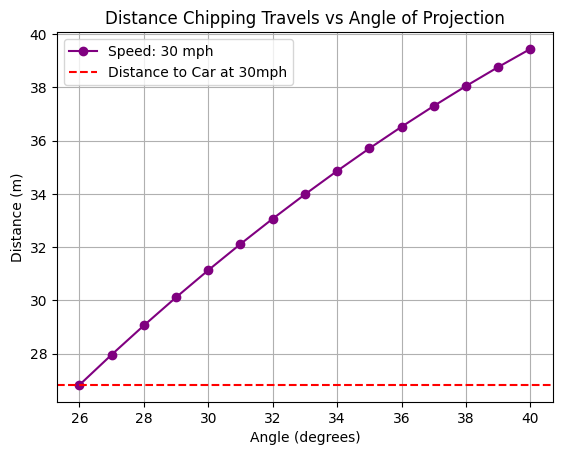

In [1]:
import math
from sympy import symbols, Eq, solve
import pandas as pd
from prettytable import PrettyTable
import matplotlib.pyplot as plt


# Given values
v = 8.94  # initial speed of the stone in m/s

y_target = 0.75  # target height in meters (height of the bonnet)
g = 9.81  # acceleration due to gravity in m/s^2

angle_range = range(26, 41)
results = []
speedv = []
anglev = []
distv = []
timev = []

mph_range = range(20, 36, 5)
for mph in mph_range:
    ms = mph / 2.237  # Convert mph to m/s

    # Convert angle to radians
    for angle in angle_range:
        angle_rad = math.radians(angle)

        # Calculate the initial vertical component of velocity
        v_y0 = ms * math.sin(angle_rad)

        # Define time 't' as a symbol to solve for
        t = symbols('t')

        # Vertical motion equation: y = v_y0 * t - (1/2) * g * t^2
        vertical_eq = Eq(v_y0 * t - (1/2) * g * t**2, y_target)

        # Solve the equation for 't'
        t_values = solve(vertical_eq, t)

        # Calculate the horizontal velocity component
        v_x = (ms * math.cos(angle_rad) ) + ms

        # Calculate the horizontal distance covered at the positive time values
        horizontal_distances = [v_x * t_value for t_value in t_values]
        dist = horizontal_distances[1]
        time = t_values[1]
        timev.append(time)
        distv.append(dist)
        anglev.append(angle)
        speedv.append(mph)

        results.append({
            "speedmph": mph,
            "speed": ms,
            "angle": angle,
            "time_values": time,
            "horizontal_distances": dist
        })

for result in results:
    angle = result["angle"]
    speed = result["speed"]
    speed1 = result["speedmph"]
    horizontal_distance = result["horizontal_distances"]
    rounded_dist = round(horizontal_distance, 2)
    cardist = round(2 * speed, 2)
    if rounded_dist <= cardist:
        damage = "No"
    else:
        damage = "Yes"



x_20 = anglev[:15]
y_20 = distv[:15]
x_25 = anglev[15:30]
y_25 = distv[15:30]
x_30 = anglev[30:45]
y_30 = distv[30:45]
x_35 = anglev[45:60]
y_35 = distv[45:60]
x_40 = anglev[60:75]
y_40 = distv[60:75]
x_45 = anglev[75:90]
y_45 = distv[75:90]
x_50 = anglev[90:105]
y_50 = distv[90:105]
x_55 = anglev[105:120]
y_55 = distv[105:120]



plt.plot(x_20, y_20, label='Speed: 20 mph', color='blue', marker = 'o')
plt.plot(x_25, y_25, label='Speed: 25 mph', color='green', marker = 'o')
plt.plot(x_30, y_30, label='Speed: 30 mph', color='red', marker = 'o')
plt.axhline(y=17.88, color='orange', linestyle='--', label='Distance to Car at 20mph')
plt.axhline(y=22.35, color='purple', linestyle='--', label='Distance to Car at 25mph')
plt.axhline(y=26.82, color='olive', linestyle='--', label='Distance to Car at 30mph')
plt.xlabel('Angle (degrees)')
plt.ylabel('Distance (m)')
plt.title('Distance Chipping Travels vs Angle of Projection for Different Speeds')
plt.legend()
plt.grid(True)
plt.savefig("graph.png")
plt.show()


plt.plot(x_20, y_20, label='Speed: 20 mph', color='blue', marker = 'o')
plt.axhline(y=17.88, color='red', linestyle='--', label='Distance to Car at 20mph')
plt.xlabel('Angle (degrees)')
plt.ylabel('Distance (m)')
plt.title('Distance Chipping Travels vs Angle of Projection')
plt.legend()
plt.grid(True)
plt.savefig("graph20.png")
plt.show()


plt.plot(x_25, y_25, label='Speed: 25 mph', color='green', marker = 'o')
plt.axhline(y=22.35, color='red', linestyle='--', label='Distance to Car at 25mph')
plt.xlabel('Angle (degrees)')
plt.ylabel('Distance (m)')
plt.title('Distance Chipping Travels vs Angle of Projection')
plt.legend()
plt.grid(True)
plt.savefig("graph25.png")
plt.show()

plt.plot(x_30, y_30, label='Speed: 30 mph', color='purple', marker = 'o')
plt.axhline(y=26.82, color='red', linestyle='--', label='Distance to Car at 30mph')
plt.xlabel('Angle (degrees)')
plt.ylabel('Distance (m)')
plt.title('Distance Chipping Travels vs Angle of Projection')
plt.legend()
plt.grid(True)
plt.savefig("graph30.png")
plt.show()

